## Model evaluation

In [1]:
import itertools
import seaborn as sns
from sklearn import preprocessing
from melanoma_utility_scripts import *

pd.set_option('max_colwidth', 120)
!ls /kaggle/input/melanomas-oof/

129-oof.csv  138-oof.csv      147-oof.csv      153-oof.csv	18-meta-oof.csv
131-oof.csv  139-oof.csv      149-oof.csv      156-oof.csv	19-meta-oof.csv
132-oof.csv  14-meta-oof.csv  15-meta-oof.csv  157-oof.csv	20-meta-oof.csv
134-oof.csv  140-oof.csv      150-oof.csv      159-oof.csv
136-oof.csv  145-oof.csv      151-oof.csv      16-meta-oof.csv
137-oof.csv  146-oof.csv      152-oof.csv      17-meta-oof.csv


In [2]:
model_paths = [
    ('/kaggle/input/melanomas-oof/131-oof.csv',          ['pred_blend']),     #LB 0.9508
    ('/kaggle/input/melanomas-oof/132-oof.csv',          ['pred_last']),      #LB 0.9503
    ('/kaggle/input/melanomas-oof/134-oof.csv',          ['pred_blend']),     #LB 0.9569
    ('/kaggle/input/melanomas-oof/138-oof.csv',          ['pred']),           #LB 0.9515
    ('/kaggle/input/melanomas-oof/147-oof.csv',          ['pred']),           #LB 0.9512
    ('/kaggle/input/melanomas-oof/151-oof.csv',          ['pred']),           #LB 0.9507
    ('/kaggle/input/melanomas-oof/153-oof.csv',          ['pred']),           #LB 0.9507
    
    # meta models
    ('/kaggle/input/melanomas-oof/16-meta-oof.csv',          ['pred']),       #LB 0.6735
    ('/kaggle/input/melanomas-oof/17-meta-oof.csv',          ['pred']),       #LB 0.6840
    ('/kaggle/input/melanomas-oof/18-meta-oof.csv',          ['pred']),       #LB 0.7423
    ('/kaggle/input/melanomas-oof/19-meta-oof.csv',          ['pred']),       #LB 0.6910
    ('/kaggle/input/melanomas-oof/20-meta-oof.csv',          ['pred']),       #LB 0.6722
]

cv_dict = {'131': 0.9508, 
           '132': 0.9503, 
           '134': 0.9569, 
           '138': 0.9515, 
           '147': 0.9512, 
           '151': 0.9507, 
           '153': 0.9507, 
          }

oof_df = pd.read_csv(model_paths[0][0])[['image_name', 'target']]

for model_path, cols in model_paths:
    oof_df_ = pd.read_csv(model_path)
    oof_df_ = oof_df_[cols]
    ds_path = model_path.split('/')[4]
    if 'meta' in ds_path:
        model_num = ds_path[:7]
    else:
        model_num = ds_path[:3]
    for col in [col for col in oof_df_.columns if 'pred' in col]:
        oof_df[f'{model_num}'] = oof_df_[col]
        
display(oof_df.head())
display(oof_df.describe())

,image_name,target,131,132,134,138,147,151,153,16-meta,17-meta,18-meta,19-meta,20-meta
0,ISIC_2637011,0,0.381172,0.144233,0.105807,0.103655,0.088400,0.027717,0.058184,0.425702,0.361196,0.262490,0.093734,0.011699
1,ISIC_0076262,0,0.035274,0.032375,0.041506,0.034784,0.033027,0.026712,0.029169,0.424776,0.362461,0.130832,0.099011,0.012273
2,ISIC_0074268,0,0.015061,0.016950,0.016000,0.017850,0.019101,0.010199,0.010590,0.378841,0.380684,0.267353,0.118810,0.008710
3,ISIC_0015719,0,0.012508,0.011653,0.015434,0.014612,0.016894,0.008057,0.007155,0.424776,0.362461,0.261717,0.099011,0.012273
4,ISIC_0082543,0,0.024458,0.015870,0.018125,0.018422,0.017267,0.010844,0.013931,0.440472,0.366689,0.155796,0.111720,0.017098


,target,131,132,134,138,147,151,153,16-meta,17-meta,18-meta,19-meta,20-meta
count,32692.000000,32692.000000,32692.000000,32692.000000,32692.000000,32692.000000,32692.000000,32692.000000,32692.000000,32692.000000,32692.000000,32692.000000,32692.000000
mean,0.017772,0.072684,0.079488,0.071417,0.078242,0.089348,0.080142,0.085871,0.435723,0.381982,0.239030,0.120563,0.017419
std,0.132124,0.124592,0.142945,0.123079,0.158891,0.165754,0.160016,0.163662,0.063147,0.056007,0.116169,0.059939,0.015200
min,0.000000,0.003564,0.003393,0.000572,0.004536,0.000870,0.000177,0.000291,0.353200,0.315614,0.105437,0.014933,0.003889
25%,0.000000,0.019723,0.018735,0.020149,0.020660,0.018678,0.012246,0.014366,0.378841,0.333588,0.149200,0.086544,0.008710
50%,0.000000,0.027951,0.026278,0.029709,0.025950,0.025725,0.021471,0.023955,0.429651,0.379269,0.205581,0.111720,0.012938
75%,0.000000,0.058886,0.061878,0.057005,0.042435,0.060000,0.054016,0.059426,0.466554,0.396815,0.291507,0.142243,0.020613
max,1.000000,0.997279,0.993183,0.997612,0.997882,0.999581,0.999256,0.997733,0.636715,0.578624,0.732893,0.420042,0.236127


## Correlation heatmap

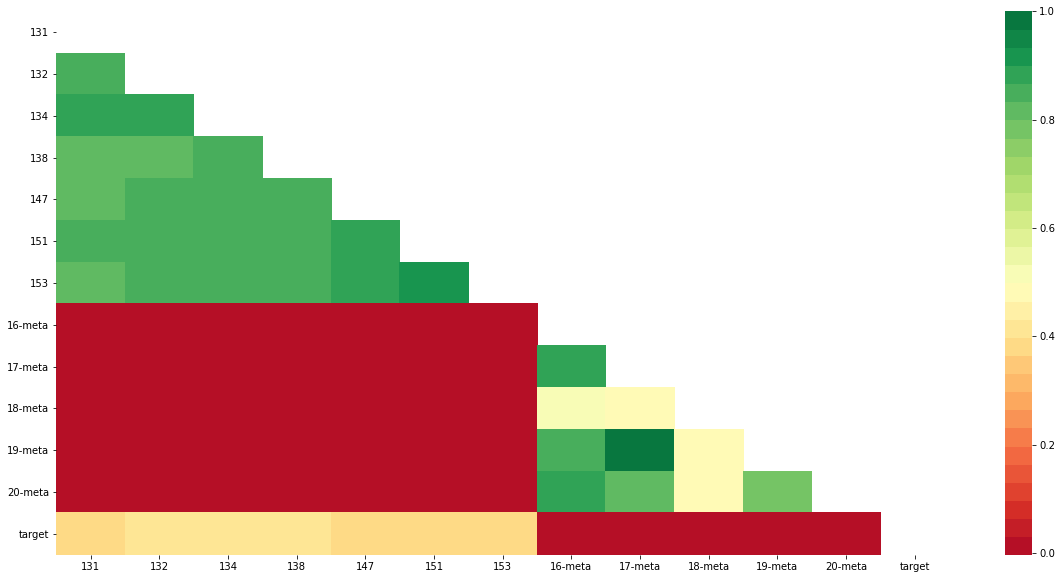

In [3]:
corr = oof_df[[col for col in oof_df.columns if col[0].isdigit()] + ['target']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20, 10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.color_palette("RdYlGn", 30), mask=mask)
plt.show()

In [4]:
# Correlations
corr_img = oof_df[[col for col in oof_df.columns if (col[0].isdigit()) & (not 'meta' in col)]].corr()
mean_corr = corr_img.mean()
mean_corr = mean_corr.sort_values(ascending=True)
display(mean_corr)

138    0.861103
131    0.861855
132    0.865932
147    0.871915
153    0.876239
134    0.876764
151    0.881610
dtype: float64

In [5]:
n_combinations = 10

for n_combination in range(2,  n_combinations+1):
    iter_comb = [pair for pair in itertools.combinations([col for col in oof_df.columns if (col[0].isdigit()) 
                                                          & (not 'meta' in col) & (not '-' in col)], n_combination)]

    for permut in iter_comb:
        col_name = '-'.join(permut).replace('pred_', '')
        ensemble_cols = [col for col in permut]
        oof_df[col_name] = np.mean([oof_df[col] for col in permut], axis=0) # Simple average
        oof_df[f'exp_log_{col_name}'] = np.exp(np.mean([oof_df[col].apply(lambda x: np.log(x)) for col in permut], axis=0)) # Log Exp average        
        
        total_score = 0
        for col in ensemble_cols:
            total_score += cv_dict[col]
        oof_df[f'w_{col_name}'] = np.mean([oof_df[col]*(cv_dict[col]/total_score) for col in permut], axis=0) # Weighted average
        oof_df[f'w_exp_log_{col_name}'] = np.exp(np.mean([oof_df[col].apply(lambda x: np.log(x))*(cv_dict[col]/total_score) for col in permut], axis=0)) # Log Exp average        

In [6]:
cols = []
aucs = []
preds = []
 
for col in [col for col in oof_df.columns if '-' in col]:
    auc = roc_auc_score(oof_df['target'], oof_df[col])
    cols.append(col)
    aucs.append(auc)
    preds.append(col.count('-')+1)

oof_avg = pd.DataFrame(zip(cols, aucs, preds), columns=['Colum', 'AUC', 'Used preds']).sort_values(by=['AUC'], ascending=False)
display(oof_avg.head(15))

,Colum,AUC,Used preds
372,w_exp_log_131-132-134-138-147,0.942878,5
370,exp_log_131-132-134-138-147,0.942877,5
458,exp_log_131-132-134-138-147-153,0.942815,6
460,w_exp_log_131-132-134-138-147-153,0.942813,6
457,131-132-134-138-147-153,0.942802,6
459,w_131-132-134-138-147-153,0.942802,6
377,131-132-134-138-153,0.942796,5
379,w_131-132-134-138-153,0.942796,5
454,exp_log_131-132-134-138-147-151,0.942789,6
371,w_131-132-134-138-147,0.942789,5


# Ensemble with meta models

In [7]:
ensemble_cols = [col for col in oof_df.columns if ('-' in col) & (not 'meta' in col)]
meta_cols = [col for col in oof_df.columns if 'meta' in col]
meta_image_comb = list(itertools.product(meta_cols, ensemble_cols))


for meta_col, image_col in meta_image_comb:
    best_auc = 0
    best_weigt = 0
    for weight in range(1, 6): # Find best weights
        weight = weight/10
        auc = roc_auc_score(oof_df['target'], ((oof_df[image_col]*(1-weight)) + (oof_df[meta_col]*weight)))
        if auc > best_auc:
            best_auc = auc
            best_weigt = weight
            
    oof_df[f'{int(best_weigt*10)}*{meta_col}*{image_col}'] = (oof_df[image_col]*(1-best_weigt)) + (oof_df[meta_col]*best_weigt) # Weighted average

In [8]:
cols = []
aucs = []
preds = []
 
for col in [col for col in oof_df.columns if '*' in col]:
    auc = roc_auc_score(oof_df['target'], oof_df[col])
    cols.append(col)
    aucs.append(auc)
    preds.append(col.count('-')+1)

oof_avg = pd.DataFrame(zip(cols, aucs, preds), columns=['Colum', 'AUC', 'Used preds']).sort_values(by=['AUC'], ascending=False)
display(oof_avg.head(10))

,Colum,AUC,Used preds
2287,1*20-meta*w_exp_log_131-132-134-138-147,0.942823,6
2375,1*20-meta*w_exp_log_131-132-134-138-147-153,0.942752,7
2371,1*20-meta*w_exp_log_131-132-134-138-147-151,0.942727,7
2292,1*20-meta*131-132-134-138-153,0.942692,6
2372,1*20-meta*131-132-134-138-147-153,0.942615,7
2284,1*20-meta*131-132-134-138-147,0.942605,6
2285,1*20-meta*exp_log_131-132-134-138-147,0.942601,6
2368,1*20-meta*131-132-134-138-147-151,0.942576,7
2303,1*20-meta*w_exp_log_131-132-134-147-153,0.942553,6
2373,1*20-meta*exp_log_131-132-134-138-147-153,0.942544,7


# Best results

In [9]:
cols = []
aucs = []
preds = []
 
for col in [col for col in oof_df.columns if '-' in col]:
    auc = roc_auc_score(oof_df['target'], oof_df[col])
    cols.append(col)
    aucs.append(auc)
    preds.append(col.count('-')+1)

oof_avg = pd.DataFrame(zip(cols, aucs, preds), columns=['Colum', 'AUC', 'Used preds']).sort_values(by=['AUC'], ascending=False)
display(oof_avg.head(20))

,Colum,AUC,Used preds
372,w_exp_log_131-132-134-138-147,0.942878,5
370,exp_log_131-132-134-138-147,0.942877,5
2772,1*20-meta*w_exp_log_131-132-134-138-147,0.942823,6
458,exp_log_131-132-134-138-147-153,0.942815,6
460,w_exp_log_131-132-134-138-147-153,0.942813,6
457,131-132-134-138-147-153,0.942802,6
459,w_131-132-134-138-147-153,0.942802,6
377,131-132-134-138-153,0.942796,5
379,w_131-132-134-138-153,0.942796,5
454,exp_log_131-132-134-138-147-151,0.942789,6
